In [2]:
import pandas as pd
import re
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# define style for charts
plt.style.use('ggplot')

# expand number of columns to better viz
pd.set_option('display.max_columns', 50)

df_players = pd.read_csv("players.csv", index_col=0)

In [3]:
df_players.shape

(5550, 30)

In [4]:
df_players.head(10)

,Name,Team,Country,League,Rating,Rare,Version color,Position,Other Positions,Version,Run type,Price,Skill,Weak foot,Attack rate,Defense rate,Pace,Shoot,Pass,Drible,Defense,Physical,Body type,Height (cm),Weight (kg),Popularity,Base Stats,In Game Stats,Game version,Updated at
0,Pelé,FUT ICONS,Brazil,Icons,98,rare,icon gold,CAM,"CF,ST",Icon,Explosive,5.53M,5,4,H,M,95,96,93,96,60,76,Unique,173.0,70.0,3357,516,2513,FIFA 23,2023-03-10
1,Lionel Messi,Paris SG,Argentina,Ligue 1,98,rare,toty gold,RW,RM,TOTY,Controlled,6.87M,4,4,H,L,93,98,97,99,40,77,Messi,169.0,67.0,4928,504,2469,FIFA 23,2023-03-10
2,Karim Benzema,Real Madrid,France,LaLiga Santander,97,rare,toty gold,CF,ST,TOTY,Controlled,3.58M,4,5,H,M,92,97,90,94,45,90,Average,185.0,81.0,3979,508,2449,FIFA 23,2023-03-10
3,Kylian Mbappé,Paris SG,France,Ligue 1,97,rare,toty gold,ST,"CF,LW",TOTY,Controlled,14.82M,5,4,H,L,99,96,88,98,44,87,Unique,182.0,73.0,3201,512,2455,FIFA 23,2023-03-10
4,Kevin De Bruyne,Manchester City,Belgium,Premier League,97,rare,toty gold,CM,CAM,TOTY,Controlled,3.94M,4,5,H,H,85,94,98,94,81,86,Unique,181.0,70.0,2045,538,2593,FIFA 23,2023-03-10
5,Ronaldo,FUT ICONS,Brazil,Icons,96,rare,icon gold,ST,CF,Icon,Controlled,10.83M,5,5,M,M,97,95,81,95,45,76,R9,183.0,78.0,3579,489,2341,FIFA 23,2023-03-10
6,Zinedine Zidane,FUT ICONS,France,Icons,96,rare,icon gold,CAM,CM,Icon,Controlled,3.42M,5,5,M,M,85,92,96,95,75,86,Average,185.0,77.0,1496,529,2548,FIFA 23,2023-03-10
7,Pelé,FUT ICONS,Brazil,Icons,96,rare,wc_icon gold,CF,"CAM,ST",World Cup ICON,Explosive,5.01M,5,4,H,M,96,94,92,95,58,75,Unique,173.0,70.0,1139,510,2475,FIFA 23,2023-03-10
8,Thibaut Courtois,Real Madrid,Belgium,LaLiga Santander,96,rare,toty gold,GK,NaN,TOTY,Controlled,535K,1,3,M,M,90,95,85,97,60,95,Courtois,199.0,96.0,2410,522,1002,FIFA 23,2023-03-10
9,Virgil van Dijk,Liverpool,Netherlands,Premier League,96,rare,toty gold,CB,NaN,TOTY,Lengthy,2.3M,2,3,M,H,88,65,80,83,97,94,Unique,193.0,92.0,-221,507,2400,FIFA 23,2023-03-10


In [5]:
df_players.columns

Index(['Name', 'Team', 'Country', 'League', 'Rating', 'Rare', 'Version color',
       'Position', 'Other Positions', 'Version', 'Run type', 'Price', 'Skill',
       'Weak foot', 'Attack rate', 'Defense rate', 'Pace', 'Shoot', 'Pass',
       'Drible', 'Defense', 'Physical', 'Body type', 'Height (cm)',
       'Weight (kg)', 'Popularity', 'Base Stats', 'In Game Stats',
       'Game version', 'Updated at'],
      dtype='object')

In [6]:
df_players.dtypes

Name                object
Team                object
Country             object
League              object
Rating               int64
Rare                object
Version color       object
Position            object
Other Positions     object
Version             object
Run type            object
Price               object
Skill                int64
Weak foot            int64
Attack rate         object
Defense rate        object
Pace                 int64
Shoot                int64
Pass                 int64
Drible               int64
Defense              int64
Physical             int64
Body type           object
Height (cm)        float64
Weight (kg)        float64
Popularity           int64
Base Stats           int64
In Game Stats        int64
Game version        object
Updated at          object
dtype: object

# Step 2 - Data preparation

Rename columns with a patten (lowercase and _)

In [7]:
columns = df_players.columns.str.replace(" ", "_").str.lower()

df_players.columns = list(columns)

Normalizing the column price by transformin K or M in numbers, for example: 500K to 500000 and changing data type to int.

In [8]:
df_players['price'] = df_players['price'].replace({'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

df_players['price']

0        5530000
1        6870000
2        3580000
3       14820000
4        3940000
          ...   
5545         400
5546        1300
5547         450
5548         400
5549         750
Name: price, Length: 5550, dtype: int64

In [9]:
df_players

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_(cm),weight_(kg),popularity,base_stats,in_game_stats,game_version,updated_at
0,Pelé,FUT ICONS,Brazil,Icons,98,rare,icon gold,CAM,"CF,ST",Icon,Explosive,5530000,5,4,H,M,95,96,93,96,60,76,Unique,173.0,70.0,3357,516,2513,FIFA 23,2023-03-10
1,Lionel Messi,Paris SG,Argentina,Ligue 1,98,rare,toty gold,RW,RM,TOTY,Controlled,6870000,4,4,H,L,93,98,97,99,40,77,Messi,169.0,67.0,4928,504,2469,FIFA 23,2023-03-10
2,Karim Benzema,Real Madrid,France,LaLiga Santander,97,rare,toty gold,CF,ST,TOTY,Controlled,3580000,4,5,H,M,92,97,90,94,45,90,Average,185.0,81.0,3979,508,2449,FIFA 23,2023-03-10
3,Kylian Mbappé,Paris SG,France,Ligue 1,97,rare,toty gold,ST,"CF,LW",TOTY,Controlled,14820000,5,4,H,L,99,96,88,98,44,87,Unique,182.0,73.0,3201,512,2455,FIFA 23,2023-03-10
4,Kevin De Bruyne,Manchester City,Belgium,Premier League,97,rare,toty gold,CM,CAM,TOTY,Controlled,3940000,4,5,H,H,85,94,98,94,81,86,Unique,181.0,70.0,2045,538,2593,FIFA 23,2023-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,Mateo Retegui,Tigre,Argentina,Primera División (ARG 1),73,rare,silver,ST,CF,Normal,Lengthy,400,3,3,H,L,67,73,62,67,35,75,High & Average,186.0,86.0,7,379,1786,FIFA 23,2023-03-10
5546,Manuel Morlanes Ariño,Villarreal CF,Spain,LaLiga Santander,73,rare,silver,CDM,CM,Normal,Controlled,1300,3,3,M,M,68,64,74,73,69,67,Average,178.0,75.0,-1,415,1992,FIFA 23,2023-03-10
5547,Monchu,R. Valladolid CF,Spain,LaLiga Santander,73,rare,silver,CM,CDM,Normal,Controlled,450,3,3,M,M,69,68,73,72,67,65,Average,173.0,68.0,3,414,1975,FIFA 23,2023-03-10
5548,Abdou Harroui,Sassuolo,Morocco,Serie A TIM,73,rare,silver,CDM,"RM,CM",Normal,Controlled,400,3,5,M,M,74,68,70,75,67,75,Average,182.0,76.0,8,429,2005,FIFA 23,2023-03-10


Remove players with 'World Cup Player' as version. They were a special version but we don't want them in this analysis

In [10]:
df_players = df_players.query('version != "World Cup Player" and league != "Icons"')

Selecting only players with high/ medium rating

In [11]:
df_players = df_players.loc[df_players['rating'] >= 84]\
                                .reset_index(drop=True)\
                                .copy()

Remove duplicated entries

In [12]:
df_players = df_players.loc[~df_players.duplicated(subset=['name', 
                                                           'team', 
                                                           'rating', 
                                                           'version', 
                                                           'position'])]\
                                                            .reset_index(drop=True)\
                                                            .copy()

Some players don't have the information about Version but it should not be a problem.

In [13]:
df_players[df_players['version'].isna()]

,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_(cm),weight_(kg),popularity,base_stats,in_game_stats,game_version,updated_at
791,Ilkay Gündogan,Manchester City,Germany,Premier League,85,rare,gold,CM,CDM,NaN,Controlled,14500,4,4,H,M,64,80,85,85,72,72,Average,180.0,80.0,160,458,2234,FIFA 23,2023-03-10
792,Kyle Walker,Manchester City,England,Premier League,85,rare,gold,RB,RWB,NaN,Lengthy,18750,3,2,H,H,91,63,77,78,80,82,Unique,183.0,83.0,2177,471,2214,FIFA 23,2023-03-10
793,Jamie Vardy,Leicester City,England,Premier League,85,rare,gold,ST,CF,NaN,Controlled,14000,3,4,H,M,84,84,70,79,52,72,Unique,179.0,74.0,219,441,2142,FIFA 23,2023-03-10
794,Aubameyang,Chelsea,Gabon,Premier League,85,rare,gold,ST,CF,NaN,Controlled,14000,4,4,H,L,87,84,74,79,36,68,Unique,187.0,80.0,485,428,2063,FIFA 23,2023-03-10
967,Declan Rice,West Ham,England,Premier League,84,rare,gold,CDM,NaN,NaN,Lengthy,4600,2,3,M,H,71,64,74,76,82,83,High & Average,185.0,80.0,144,450,2111,FIFA 23,2023-03-10
968,Oyarzabal,Real Sociedad,Spain,LaLiga Santander,84,rare,gold,LW,"LM,RW",NaN,Controlled,4500,3,3,H,M,80,83,81,84,41,62,Lean,181.0,79.0,35,431,2088,FIFA 23,2023-03-10
969,Marcos Llorente,Atlético de Madrid,Spain,LaLiga Santander,84,rare,gold,CM,"RB,RM",NaN,Controlled,11750,3,4,H,M,88,79,81,82,78,81,Lean,184.0,74.0,1743,489,2276,FIFA 23,2023-03-10
970,Kessié,FC Barcelona,Côte d'Ivoire,LaLiga Santander,84,rare,gold,CDM,CM,NaN,Lengthy,4800,3,4,H,H,78,76,74,79,82,87,Average,183.0,88.0,1273,476,2236,FIFA 23,2023-03-10
971,De Paul,Atlético de Madrid,Argentina,LaLiga Santander,84,rare,gold,CM,NaN,NaN,Controlled,4700,4,3,H,M,78,77,83,82,75,81,Average,180.0,70.0,337,476,2265,FIFA 23,2023-03-10
972,Ivan Perišić,Spurs,Croatia,Premier League,84,rare,gold,LM,"LWB,LW",NaN,Controlled,4600,4,5,H,M,78,81,79,82,74,78,High & Average+,186.0,80.0,190,472,2288,FIFA 23,2023-03-10


In [14]:
df_players.shape

(1105, 30)

## Step 3 - Feature Understanding

In [15]:
top_10_leagues = df_players['league'].value_counts().head(10)

print(top_10_leagues)

df_top_league_players = df_players.loc[df_players['league'].isin(top_10_leagues.index)]

df_top_league_players

Premier League            291
LaLiga Santander          201
Serie A TIM               185
Bundesliga                161
Ligue 1                   130
Major League Soccer        37
Eredivisie                 28
Liga NOS (POR 1)           20
Süper Lig (TUR 1)          12
MBS Pro League (SAU 1)     11
Name: league, dtype: int64


,name,team,country,league,rating,rare,version_color,position,other_positions,version,run_type,price,skill,weak_foot,attack_rate,defense_rate,pace,shoot,pass,drible,defense,physical,body_type,height_(cm),weight_(kg),popularity,base_stats,in_game_stats,game_version,updated_at
0,Lionel Messi,Paris SG,Argentina,Ligue 1,98,rare,toty gold,RW,RM,TOTY,Controlled,6870000,4,4,H,L,93,98,97,99,40,77,Messi,169.0,67.0,4928,504,2469,FIFA 23,2023-03-10
1,Karim Benzema,Real Madrid,France,LaLiga Santander,97,rare,toty gold,CF,ST,TOTY,Controlled,3580000,4,5,H,M,92,97,90,94,45,90,Average,185.0,81.0,3979,508,2449,FIFA 23,2023-03-10
2,Kylian Mbappé,Paris SG,France,Ligue 1,97,rare,toty gold,ST,"CF,LW",TOTY,Controlled,14820000,5,4,H,L,99,96,88,98,44,87,Unique,182.0,73.0,3201,512,2455,FIFA 23,2023-03-10
3,Kevin De Bruyne,Manchester City,Belgium,Premier League,97,rare,toty gold,CM,CAM,TOTY,Controlled,3940000,4,5,H,H,85,94,98,94,81,86,Unique,181.0,70.0,2045,538,2593,FIFA 23,2023-03-10
4,Thibaut Courtois,Real Madrid,Belgium,LaLiga Santander,96,rare,toty gold,GK,NaN,TOTY,Controlled,535000,1,3,M,M,90,95,85,97,60,95,Courtois,199.0,96.0,2410,522,1002,FIFA 23,2023-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,Junya Ito,Stade de Reims,Japan,Ligue 1,84,rare,if gold,RM,"CF,RW",IF,Explosive,12000,4,4,H,M,95,78,80,84,65,77,Lean,177.0,68.0,54,479,2263,FIFA 23,2023-03-10
1099,Matz Sels,Strasbourg,Belgium,Ligue 1,84,rare,if gold,GK,NaN,IF,Controlled,12000,1,2,M,M,83,84,82,85,42,85,High & Average,190.0,88.0,15,461,930,FIFA 23,2023-03-10
1100,Fred,Manchester Utd,Brazil,Premier League,84,rare,motm gold,CDM,CM,MOTM,Explosive,15500,4,3,H,H,81,72,84,85,80,75,Short & Lean,169.0,62.0,196,477,2335,FIFA 23,2023-03-10
1102,Javi Galán,RC Celta,Spain,LaLiga Santander,84,rare,if gold,LB,LWB,IF,Controlled,11750,3,2,H,M,84,60,79,86,80,75,Average,172.0,70.0,13,464,2195,FIFA 23,2023-03-10


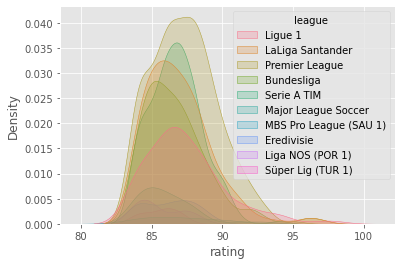

In [16]:
ax = sns.kdeplot(data=df_top_league_players, x="rating", hue='league', 
                                                warn_singular=False,
                                                fill=True
                                                )
plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

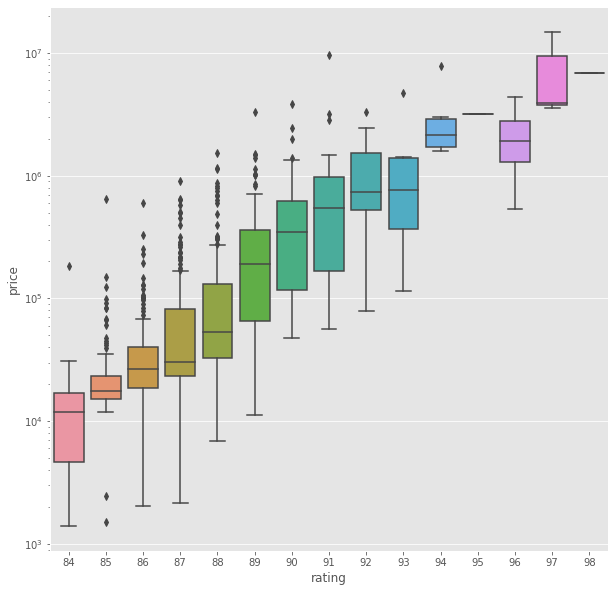

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_yscale("log")
f = sns.boxplot(x='rating',y='price',data=df_top_league_players.query('price > 0'))


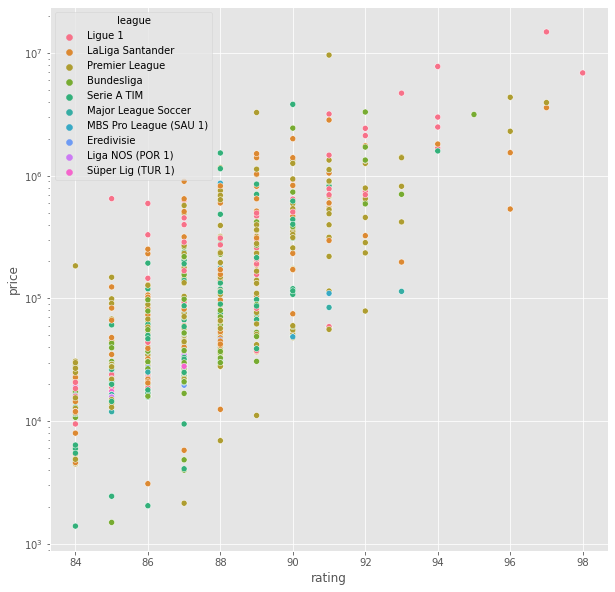

In [18]:
ax = plt.subplots(figsize=(10, 10))

ax = sns.scatterplot(data=df_top_league_players,
                        y='price',
                        x='rating',
                        hue='league')

ax.set_yscale("log")

plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

plt.show()

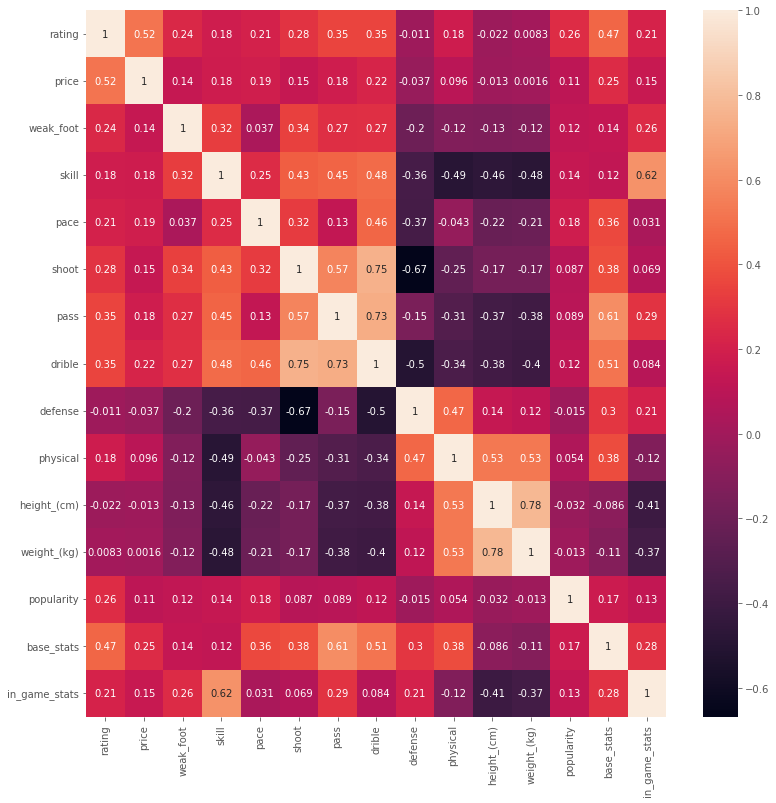

In [31]:
df_corr = df_top_league_players[['rating','price', 'weak_foot', 'skill', 
                                 'pace', 'shoot', 'pass', 'drible', 'defense', 'physical', 
                                 'height_(cm)', 'weight_(kg)', 'popularity', 'base_stats','in_game_stats' ]].dropna().corr()
ax = plt.subplots(figsize=(13, 13))

ax = sns.heatmap(df_corr, annot=True)

plt.show()

In [21]:
df_top_league_players.query('price > 0')\
                    .groupby('league')['price']\
                    .agg(['mean','max', 'min', 'count'])\
                    .sort_values('mean', ascending=False)

,mean,max,min,count
league,,,,
Ligue 1,596011.842105,14820000,4500,114
Premier League,259864.944649,9600000,2150,271
LaLiga Santander,201922.222222,3580000,3100,189
Bundesliga,157247.931034,3300000,1500,145
Serie A TIM,134822.285714,3810000,1400,175
MBS Pro League (SAU 1),130555.555556,868000,16250,9
Eredivisie,39573.913043,210000,4500,23
Major League Soccer,36018.965517,178000,4500,29
Süper Lig (TUR 1),26987.500000,52000,4500,8


In [22]:
test = df_top_league_players[['name', 'position', 'pace']]
test

,name,position,pace
0,Lionel Messi,RW,93
1,Karim Benzema,CF,92
2,Kylian Mbappé,ST,99
3,Kevin De Bruyne,CM,85
4,Thibaut Courtois,GK,90
...,...,...,...
1098,Junya Ito,RM,95
1099,Matz Sels,GK,83
1100,Fred,CDM,81
1102,Javi Galán,LB,84


In [23]:
df_top_league_players[['name', 'position', 'pace']]\
                    .sort_values(['pace'], ascending=False)\
                    .drop_duplicates(subset='name', keep='first')\
                    .drop_duplicates(subset='position', keep='first')
                    

,name,position,pace
65,Vinícius Júnior,LW,99
220,Al-Owairan,CAM,99
12,Achraf Hakimi,RB,99
718,Ahmed Musa,ST,99
529,Theo Walcott,RW,99
622,Moses Simon,LM,98
14,Theo Hernández,LB,98
203,Moussa Diaby,RM,98
752,Jeremie Frimpong,RWB,96
545,Leonardo Spinazzola,LWB,95


- Fastest player by position
- Best deal (cheapest with good ingame stats)
- IMC dos jogadores
- Strongest players by position
- Overpriced by league
- More expensive league
- Fastest nation
- Expensive club

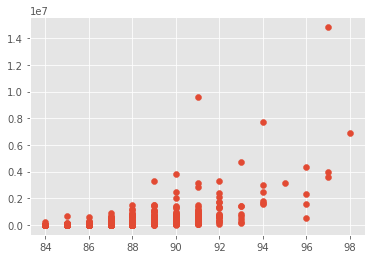

In [24]:
plt.scatter(df_top_league_players['rating'], df_top_league_players['price'])

plt.show()

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Exemplo de dados de entrada (x) e saída (y)
x = df_top_league_players['rating'].values.reshape(-1, 1)
y = df_top_league_players['price']

# Cria o objeto de regressão linear
reg = LinearRegression()

# Treina o modelo usando os dados de entrada e saída
reg.fit(x, y)

# Imprime o coeficiente de determinação (R^2) do modelo
print("Coeficiente de determinação: ", reg.score(x, y))

# Imprime os coeficientes da equação da regressão
print("Coeficientes: ", reg.coef_)



Coeficiente de determinação:  0.26639152414309986
Coeficientes:  [173105.77715371]


In [29]:
# Realiza uma previsão usando novos dados de entrada
x_test = np.array([[1000000]])
y_pred = reg.predict(x_test)
print("Previsão: ", y_pred)

Previsão:  [88.11620154]


In [ ]:
df_top_league_players[['rating', 'price']]

,rating,price
0,98,6870000
1,97,3580000
2,97,14820000
3,97,3940000
4,96,535000
...,...,...
1098,84,12000
1099,84,12000
1100,84,15500
1102,84,11750
